## Лабораторная работа №3

### Задание

Сгенерировать выборку точек, равномерно распределенных внутри круга
двумя способами:
1. Равномерно распределить точки внутри квадрата, внутрь которого вписана
окружность, и отфильтровать точки, лежащие за пределами окружности. ✔️

2. Генерировать точки путем задания случайного угла и расстояния от центра
окружности. ✔️

Радиус окружности R=10, размер выборки 1000 точек.

Для созданных выборок сделать следующее:
1. Создать рисунок, иллюстрирующий расположение точек сгенерированной
выборки внутри окружности; ✔️

2. Найти выборочные средние координат точек и их дисперсию; ✔️

3. Построить график плотности распределения расстояния от случайной равномерно
распределенной точки в круге до фиксированной точки лежащей вне окружности
(к примеру, с координатами X=20, Y=0). ✔️

4. Построить график плотности распределения расстояния между двумя
случайными точками, равномерно расположенными внутри круга. ✔️

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
uni = np.random.uniform(size = 1000)
#print(uni[0:10])

Тут мы генерируем x и y координаты для наших точек в квадрате, как в прошлой лабе

In [17]:
radius = 10
r2 = radius*2
x1 = np.random.uniform(0, r2, 1000)
y1 = np.random.uniform(0, r2, 1000)

Рассчет расстояния между точками на графике по формуле:
$$
d = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}
$$

А дальше мы просто используем только те точки, которые будут на расстоянии радиуса от центра 

In [18]:
distance = (x1 - radius)**2 + (y1 - radius)**2
points_in_circle = distance <= (radius)**2

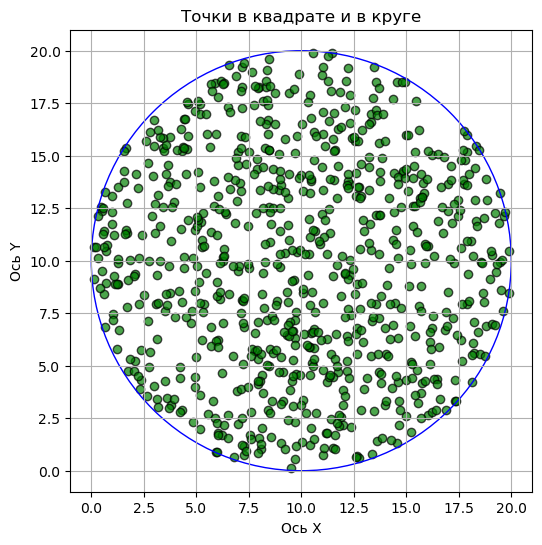

In [28]:
plt.figure(figsize=(7, 6))
#plt.scatter(x1, y1, s=50, color="red", alpha=0.7, edgecolors="black", linewidths=1)
plt.scatter(x1[points_in_circle], y1[points_in_circle], color='green',alpha=0.7, edgecolors="black", linewidths=1)
plt.xlim(0, r2)
plt.ylim(0, r2)
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.title("Точки в квадрате и в круге")
plt.grid(True)
circle1 = plt.Circle((r2/2, r2/2), radius, color='blue', fill=False)
ax=plt.gca()
ax.add_patch(circle1)
plt.axis('scaled')
plt.show()

In [20]:
mean_x = np.mean(x1[points_in_circle])
mean_y = np.mean(y1[points_in_circle])

var_x = np.var(x1[points_in_circle])
var_y = np.var(y1[points_in_circle])

print(f"Выборочное среднее по X: {mean_x}\n")
print(f"Выборочная дисперсия по X: {var_x}\n")
print(f"Выборочное среднее по Y: {mean_y}\n")
print(f"Выборочная дисперсия по Y: {var_y}")

Выборочное среднее по X: 9.956680455371336

Выборочная дисперсия по X: 24.446682282582632

Выборочное среднее по Y: 9.874801645166938

Выборочная дисперсия по Y: 24.65146687146752


Далее идет рассчет от точек внутри круга, до фисированной точки. Так как точки в кругу у нас в отдельной переменной, это не турдно.
$$
d = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}
$$

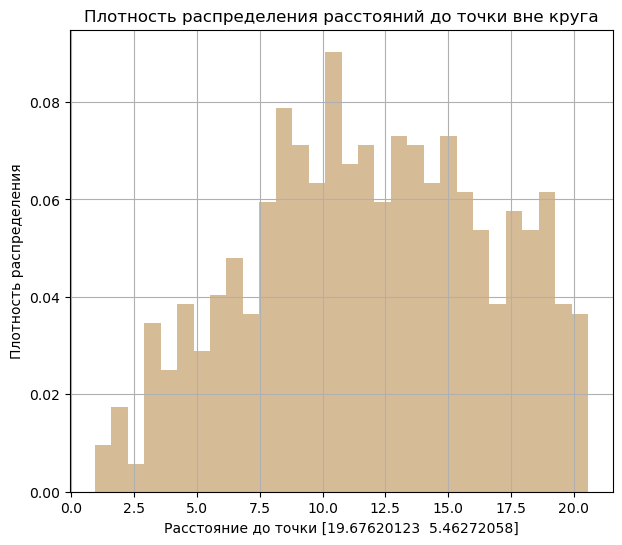

In [35]:
center = (radius,radius)
while True:
    random_point = np.random.uniform(0, radius * 2, 2)  # случайная точка в области квадрата
    distance_to_center = np.sqrt((random_point[0] - center[0])**2 + (random_point[1] - center[1])**2)
    if distance_to_center > radius:
        break  # нашли точку, которая точно вне круга

random_point_coords = (random_point[0], random_point[1]) # корды нашей случайной точки вне круга

distances_to_random_point = np.sqrt((
    x1[points_in_circle] - random_point_coords[0])**2 + (y1[points_in_circle] - random_point_coords[1])**2)
med = np.median(distances_to_random_point)
avg = np.average(distances_to_random_point)
var = np.var(distances_to_random_point)
#print(avg,med,var)

plt.figure(figsize=(7, 6))
plt.hist(distances_to_random_point, bins=30, density=True, alpha=0.9, color='tan')
plt.xlabel(f"Расстояние до точки {random_point}")
plt.ylabel("Плотность распределения")
plt.title("Плотность распределения расстояний до точки вне круга")
plt.grid(True)
plt.show()

Задаем окружность с помощью декартовых координат 
$$
x = r \cos(\theta) + \text{смещение radius }
y = r \sin(\theta) + \text{смещение radius } 
$$   

In [22]:
theta = np.random.uniform(0, 2 * np.pi, 1000)  # Случайные углы от 0 до 2π, то есть весь круг, 360 градусов
r = np.sqrt(np.random.uniform(0, 1, 1000)) * radius  # расстояния с равномерным распределением по площади
x = r * np.cos(theta) + radius
y = r * np.sin(theta) + radius

Точки сгенерированны сразу внутри окружности, все 1000 равномерно распределены

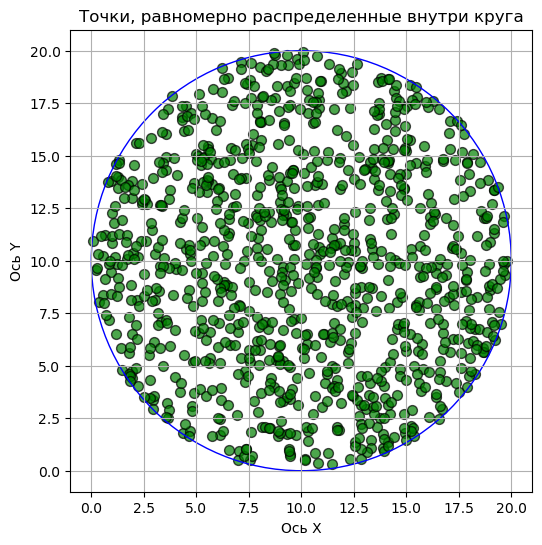

In [36]:
plt.figure(figsize=(7, 6))
plt.scatter(x, y, s=50, color="green", alpha=0.7, edgecolors="black", linewidths=1)

plt.xlim(0, radius * 2)
plt.ylim(0, radius * 2)
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.title("Точки, равномерно распределенные внутри круга")
plt.grid(True)

plt.gca().add_patch(plt.Circle((radius, radius), radius, color='blue', fill=False))
plt.axis('scaled')
plt.show()

**Расчет расстояния между двумя точками**:
   Расстояние \( d \) между двумя точками \((x_i, y_i)\) и \((x_j, y_j)\) рассчитывается по формуле Евклидова расстояния:
   $$
   d = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}
   $$
   где:
   - \( x_i \) и \( y_i \) — координаты первой точки,
   - \( x_j \) и \( y_j \) — координаты второй точки.

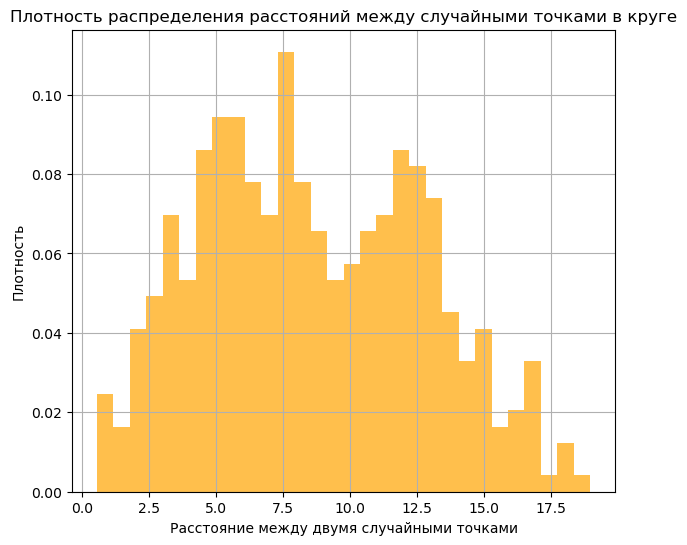

In [37]:
num_points = len(x1[points_in_circle])
random_indices = np.random.choice(num_points, (num_points // 2, 2), replace=False)

# Находим расстояния между случайными парами точек
distances_between_points = np.sqrt(
    (x1[points_in_circle][random_indices[:, 0]] - x1[points_in_circle][random_indices[:, 1]])**2 +
    (y1[points_in_circle][random_indices[:, 0]] - y1[points_in_circle][random_indices[:, 1]])**2
)

plt.figure(figsize=(7, 6))
plt.hist(distances_between_points, bins=30, density=True, alpha=0.7,color='orange')
plt.xlabel("Расстояние между двумя случайными точками")
plt.ylabel("Плотность")
plt.title("Плотность распределения расстояний между случайными точками в круге")
plt.grid(True)
plt.show()